# n차원 배열의 선형 대수학
[참고페이지](https://numpy.org/numpy-tutorials/content/tutorial-svd.html)  
**목표**
1.  1차원, 2차원 및 n차원 배열의 차이점 이해하기
2.  for 루프를 사용하지 않고  n차원 배열에 일부 선행 대수 연산을 적용하는 방법 이해하기
3.  n차원 배열의 축 모양 및 속성 이해하기

In [89]:
import numpy as np

In [90]:
from scipy import misc
img = misc.face()

## 배열 구조 확인

In [91]:
print(img.ndim)
print(img.shape)
# row:768, col:1024, RGB(3)
print(img.size) # 768*1024*3
print(img.dtype)
print(type(img))

3
(768, 1024, 3)
2359296
uint8
<class 'numpy.ndarray'>


In [92]:
img[0,0,:] # rgb 값 확인하기 

array([121, 112, 131], dtype=uint8)

In [93]:
img[0,0,0] # red 확인

121

In [94]:
print(img.max())
print(img.min())
# 8비트 필요 (256개의 경우의 수)

255
0


## imshow

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

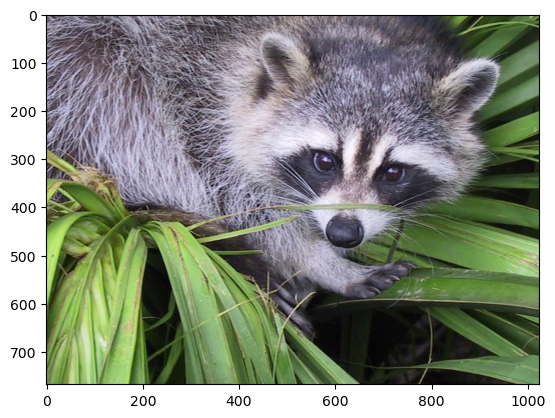

In [96]:
plt.imshow(img)
plt.show()

In [97]:
#Red 값만 확인하기
img[:,:,0]

#Green 값만 확인하기
img[:,:,1]

#Blue  값만 확인하기
img[:,:,2]


array([[131, 148, 165, ...,  74,  82,  90],
       [100, 121, 143, ...,  71,  87,  99],
       [ 84, 105, 126, ...,  71,  87,  98],
       ...,
       [ 76,  81,  92, ...,  97,  96,  95],
       [ 72,  82,  96, ...,  96,  94,  94],
       [ 74,  84,  97, ...,  95,  93,  92]], dtype=uint8)

## 수치 변환
선형대수 연산 수행할 때는 rgb 값이 0 과 1 사이의 실수로 만들어 주는 게 좋음 

In [98]:
img_array = img / 255 # 브로드캐스팅 적용

In [99]:
img_array.max(), img_array.min() # 0 과 1 사이의 실수로 만들기 

(1.0, 0.0)

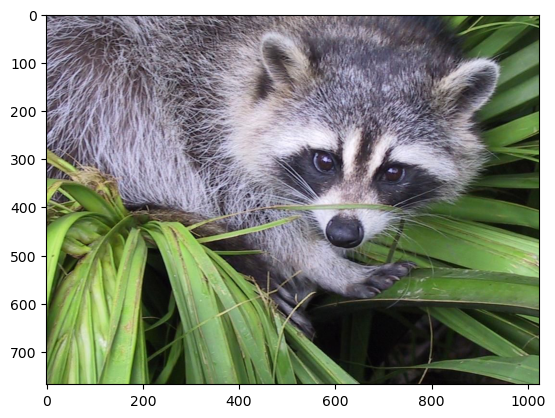

In [100]:
plt.imshow(img_array) # rgb값이 바껴도 이미지가 안바뀜
plt.show()

In [101]:
img_array.dtype

dtype('float64')

In [102]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

## 축 작업
**특이값 분해 : [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition)(Singular Value Decomposition)**  

$$ M =U \sum V^* $$

`V*` : 전치 행렬(transpose)    

In [103]:
from numpy import linalg

### 이미지를 [Grayscale](https://en.wikipedia.org/wiki/Grayscale#Colorimetric_(perceptual_luminance-reserving)_conversion_to_grayscale)로 바꾸기 

$$ Y = 0.2126R + 0.7152G + 0.0722B $$

- 연산자 `@` 를 사용해 행렬 곱  
![이미지](https://dudri63.github.io/image/algo20-1.png)

In [104]:
img_array.shape #마지막이 3이니까 값이 (3,n) 행렬 곱해야함

(768, 1024, 3)

In [106]:
img_gray = img_array @ [0.2126,0.7152,0.0722]

In [107]:
img_gray.shape

(768, 1024)

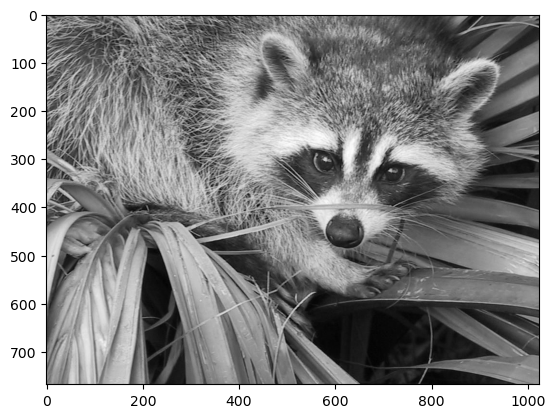

In [108]:
# plt.imshow(img_gray)
plt.imshow(img_gray, cmap="gray") #이미지의 회색조 부분을 근사화
plt.show()

특이값 분해 -> 3 개의 값으로 반환

In [109]:
U, s, Vt = linalg.svd(img_gray) #(768,1024)

In [110]:
U.shape, s.shape, Vt.shape # s랑 Vt 연산안됨 -> numpy로 맞춰주기 

((768, 768), (768,), (1024, 1024))

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/800px-Singular_value_decomposition_visualisation.svg.png" width='20%' height="10%" />    


In [111]:
Sigma = np.zeros((U.shape[1],Vt.shape[0]))

In [112]:
Sigma.shape

(768, 1024)

In [113]:
np.fill_diagonal(Sigma,s) # 대각선으로 값 채우기

In [114]:
Sigma

array([[410.42098224,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  85.56090199,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  63.61066707, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

분해한 값 다시 합치기

In [115]:
U@Sigma@Vt

array([[0.45209882, 0.51876549, 0.57815529, ..., 0.47355843, 0.51387529,
        0.54524784],
       [0.33250118, 0.41485412, 0.49104706, ..., 0.46907059, 0.53181569,
        0.57887451],
       [0.26975608, 0.35210902, 0.43446196, ..., 0.47104157, 0.53378667,
        0.57692392],
       ...,
       [0.39135137, 0.40982196, 0.46304078, ..., 0.5706549 , 0.56673333,
        0.5692549 ],
       [0.37452784, 0.41374353, 0.47675608, ..., 0.56840078, 0.56419608,
        0.56419608],
       [0.37509412, 0.42158667, 0.47340078, ..., 0.56447922, 0.56027451,
        0.55635294]])

## 근사치 구하기
근사치가 0에 가까울 수록 원상복구 되었다  
방법 1 . `linalg.norm`  
방법 2 . `np.allclose`  

In [116]:
linalg.norm(img_gray - U@Sigma@Vt)

1.4108253216554015e-12

In [117]:
np.allclose(img_gray , U@Sigma@Vt)

True

과연 근사치가 합리적인가??

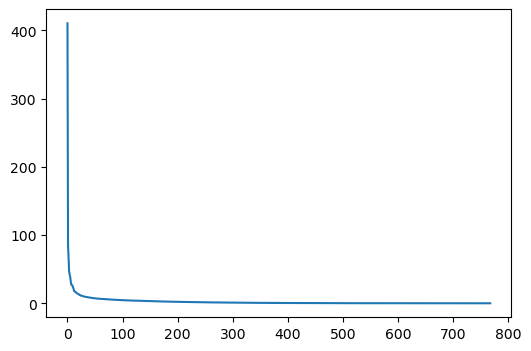

In [118]:
plt.figure(figsize=(6,4))
plt.plot(s)
plt.show()
# x : 768개의 값 , y : 각 x에 해당하는 수치값
# 해석 s 값이 중요하다 대부분은 0이니까

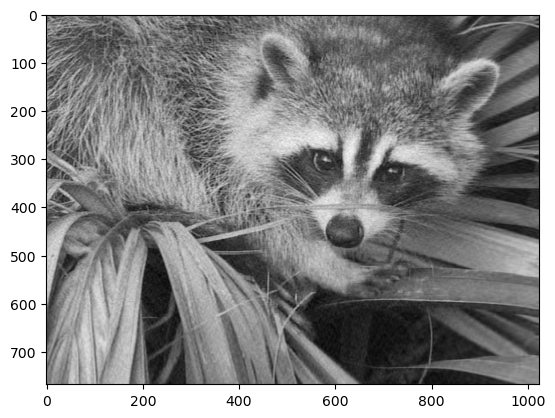

In [135]:
k = 100
approx = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(approx,cmap='gray')
plt.show()

In [120]:
img_gray.shape

(768, 1024)

In [121]:
img_test = img_gray.copy()

In [122]:
img_test = img_test[:,:,np.newaxis]

In [123]:
img_test.shape

(768, 1024, 1)

오후 

In [124]:
from PIL import Image

In [130]:
img_path = "mono.jpeg"

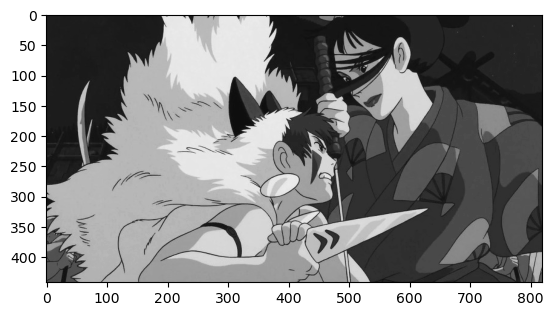

In [139]:
img = Image.open(img_path) 
img_gray = Image.open(img_path).convert('L')
plt.imshow(img_gray,cmap='gray')
plt.show()

In [132]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [134]:
np.array(img).shape

(442, 820, 3)

In [136]:
my_array = np.array(img)

In [143]:
import cv2  #BGR로 바꿔줘야한다
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

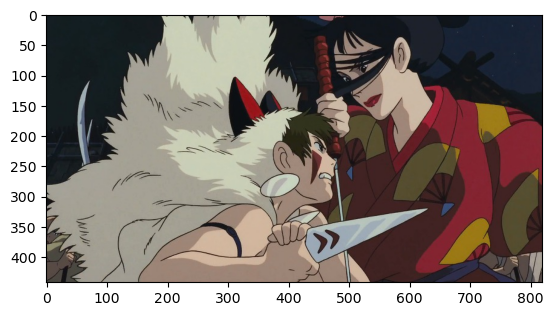

In [142]:
plt.imshow(img)
plt.show()